# Data Wrangling Project - Twitter Dog Archive

# Introduction
**This project, which is part of Udacity's Data Analyst Nanodegree Programm, is about the twitter account @WeRateDogs that regularly posts pictures dogs, gives them a rating, fits them into a category and provides a short text along with the pictures. They have millions of followers worldwide and in this project I analyze the most important aspects of their posting history looking for the best "doggo".**

### Table of Contents

- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Analyze](#analyze)
- [Sources](#sources)

In [2]:
import requests
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='gather'></a>
# Gathering

Udacity provides 2 files that need to be cleaned. The data itself was provided to Udacity by WeRateDogs on Twitter and a machine learning algorithm Udacity used to identify dog breeds in the pictures.

I start with downloading both files programmatically for reproductivity and importing them into pandas dataframes.

In [11]:
#Create new subfolder (tidiness is important ;))
folder_name = 'twitter_archive'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#URLs to the files
url1 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'    
url2 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response1 = requests.get(url1)
response2 = requests.get(url2)

#Save to a file
with open(os.path.join(folder_name, url1.split('/')[-1]), mode = 'wb') as file:
    file.write(response1.content)
with open(os.path.join(folder_name, url2.split('/')[-1]), mode = 'wb') as file:
    file.write(response2.content)

In [3]:
archive = pd.read_csv('twitter_archive/twitter-archive-enhanced.csv')
predictions = pd.read_csv('twitter_archive/image-predictions.tsv', sep='\t')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The Dataframes are now accessible within pandas. The next step is importing new data through the Twitter API 'tweepy'.

In [6]:
import tweepy

#Setting up API access and connecting
consumer_key = ''
consumer_secret = '' 
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
failed_ids = []
tweet_ids = list(archive.tweet_id)

#For loop to save the tweet data to a JSON file and saving failed ids
#to a seperate list
with open(os.path.join('twitter_archive', 'tweet_json.txt'), mode='a', encoding='UTF-8') as file:
    for id in tweet_ids:
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            print('Error while parsing: ' + str(id))
            failed_ids.append(id)

Rate limit reached. Sleeping for: 86


Error while parsing: 888202515573088257
Error while parsing: 873697596434513921
Error while parsing: 872668790621863937
Error while parsing: 869988702071779329
Error while parsing: 866816280283807744
Error while parsing: 861769973181624320
Error while parsing: 845459076796616705
Error while parsing: 842892208864923648
Error while parsing: 837012587749474308
Error while parsing: 827228250799742977
Error while parsing: 812747805718642688
Error while parsing: 802247111496568832
Error while parsing: 775096608509886464
Error while parsing: 770743923962707968


Rate limit reached. Sleeping for: 547


Error while parsing: 754011816964026368
Error while parsing: 680055455951884288


Rate limit reached. Sleeping for: 561


In [4]:
#I import the whole JSON into a pandas Dataframe using .read_json
jdata = 'twitter_archive/tweet_json.txt'
tweet_addition = pd.read_json(jdata, convert_dates=True, lines=True, encoding='UTF-8')

I import the whole dataset into a pandas DataFrame to make it easier to add additional parameters. It is an easy task during cleaning to extract certain columns, but adding them in later on is much more difficult.

**I successfully imported 3 DataFrames into pandas: "archive" (provided directly by WeRateDogs), "predictions" (image predictions from Udacity using machine learning algorithms) and "tweet_addition" (additional information gathered from the API). 
<br><br> 
They all come from different sources, hence they need to be addressed seperately during assessing and cleaning. I try to merge all three tables into one that contains all relevant information for this project.**

<a id='assess'></a>
# Assess

In [74]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
130,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,13,10,None,None,None,None,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
370,828409743546925057,NaN,NaN,2017-02-06 01:07:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mutt Ryan. He's quite confident at the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,None,None,None,None
1516,690959652130045952,NaN,NaN,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690959652...,11,10,None,None,None,None,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo,None,None,None
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None


In [6]:
archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Bailey        7
Buddy         7
Daisy         7
Toby          7
Leo           6
Jack          6
Stanley       6
Bella         6
Koda          6
Milo          6
Scout         6
Rusty         6
Jax           6
Oscar         6
Dave          6
Phil          5
           ... 
Lilah         1
Ricky         1
Tedders       1
Reptar        1
Bloo          1
Cecil         1
Jackie        1
Carbon        1
Holly         1
Huck          1
Monster       1
light         1
Batdog        1
Juckson       1
Steve         1
Godzilla      1
Fletcher      1
Franq         1
Cuddles       1
Geoff         1
Blanket       1
Dewey         1
Ralph         1
Freddery      1
Moofasa       1
Vince         1
Hamrick       1
Theo          1
Billy         1
Tess          1
Name: name, Length: 957,

In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
predictions['tweet_id'].nunique()

2075

In [16]:
predictions['jpg_url'].duplicated().sum()

66

In [17]:
tweet_addition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       3226 non-null datetime64[ns]
display_text_range               3226 non-null object
entities                         3226 non-null object
extended_entities                2795 non-null object
favorite_count                   3226 non-null int64
favorited                        3226 non-null bool
full_text                        3226 non-null object
geo                              0 non-null float64
id                               3226 non-null int64
id_str                           3226 non-null int64
in_reply_to_screen_name          109 non-null object
in_reply_to_status_id            109 non-null float64
in_reply_to_status_id_str        109 non-null float64
in_reply_to_user_id              109 non-null float64
in_reply_to_user_id_str          

In [34]:
tweet_addition.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38093,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8330,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32682,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6154,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24596,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4072,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41452,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8474,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39624,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9168,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [33]:
tweet_addition['id'].duplicated().sum()

886

### Tidiness

- Merge all three DataFrames into one 
<br><br>
- Melt doggo, puppo, etc. into one column `dog_category`

### Quality

- Delete retweets and replies in `archive`
<br><br>
- Replace missing URLs in `expanded_urls`
<br><br>
- Delete invalid names like 'a', 'the', etc. in `archive` or find a way to replace them properly
<br><br>
- Delete duplicate IDs in `tweet_addition`
<br><br>
- Delete duplicate jpg_urls in `predictions`
<br><br>
- Drop unneccessary columns
<br><br>
- Some datatypes are messed up e.g. timestamp should be datetime
<br><br>
- Some pictures are not from dogs, use `predictions` to find and delete them
<br><br>
- Create a single rating column out of `rating_numerator` and `rating_denominator`

<a id='clean'></a>
# Clean

Note: order: missing data, tidiness then quality issues

In [353]:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweet_addition_clean = tweet_addition.copy()

**1. Define**<br>
Delete all tweets that are retweets or responses. Use pandas .isnull to detect all missing entries in `retweeted_status_user_id`, `in_reply_to_user_id` and only keep the tweets that don't have an entry. <br>Delete all columns (`in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_user_id`, `in_reply_to_user_id`, `retweeted_status_timestamp`) with information about retweets and replies after.

**Code**

In [354]:
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]
archive_clean.drop(['in_reply_to_user_id', 
         'in_reply_to_status_id', 
         'retweeted_status_id', 
         'retweeted_status_user_id', 
         'retweeted_status_timestamp'], inplace=True, axis=1)

**Test**

In [355]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**2. Define**<br>
Replace `doggo`, `floofer`, `pupper`, `puppo` with one column called `dog_category`.

**Code**

In [356]:
#Quick list to keep the code readable
melt = ['doggo', 'floofer', 'puppo', 'pupper']
keep = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']

#Melting the columns into one columns, 
#column headers are now values in dog_category
archive_clean = pd.melt(archive_clean, id_vars = keep, value_vars = melt, var_name = 'Value', value_name = 'dog_category')
archive_clean = archive_clean.drop('Value', axis=1)

**Test**

In [357]:
#It looks like the melt function lead to duplicates
archive_clean['dog_category'].value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_category, dtype: int64

**Code**

In [358]:
#Just dropping duplicates doesn't work because the dog_category 
#is all over the place
archive_clean = archive_clean.sort_values(by='dog_category', ascending=False)

#Now that we know that dog_category is sorted descending
#we can drop the last duplicate of tweet_id
archive_clean = archive_clean.drop_duplicates('tweet_id', keep='first')

**Test**

In [359]:
archive_clean['dog_category'].value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_category, dtype: int64

**3. Define**<br>
Define a function that replaces missing entries in `expanded_urls` with a generated one using `tweet_id`. 

**Code**

In [360]:
def generate_url(row):
    #check for NaN entries and replace them with the twitter URL and add the tweet_id
    if pd.isnull(row['expanded_urls']):
        id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(id)
        return row   
    else:
        return row

archive_clean = archive_clean.apply(generate_url, axis=1)

**Test**

In [361]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category


In [362]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 4934 to 6322
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_category          2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


**4. Define**<br>
`Name`has invalid entries like: 'a', 'the', 'an', etc. During assessment it was obvious that the invalid entries are all lowercase. Use pandas .islower function to detect those entries and .istitle to delete them from the DataFrame for now. I don't have a way to fill in the missing names, without additional information from @WeRateDogs.

**Code**

In [363]:
archive_clean = archive_clean[archive_clean['name'].str.istitle()]

**Test**

In [364]:
archive_clean[archive_clean['name'].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category


In [365]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 4934 to 6322
Data columns (total 9 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
dog_category          1987 non-null object
dtypes: int64(3), object(6)
memory usage: 155.2+ KB


**5. Define**<br>
Delete duplicate `id` in `tweet_addition_clean`.
Delete duplicate `jpg_url` in `predictions_clean`.

**Code**

In [332]:
#I found a nifty way to drop duplicates and keep the ones with the most information in them on stackoverflow (link in sources)
#First we make a new column that counts the .isnull in a row
tweet_addition_clean['count'] = pd.isnull(tweet_addition_clean).sum(1)
predictions_clean['count'] = pd.isnull(predictions_clean).sum(1)

#Then I use the new count column to sort the table before dropping duplicates
tweet_addition_clean = tweet_addition_clean.sort_values(['count']).drop_duplicates(subset=['id'], keep='first').drop('count', 1)
predictions_clean = predictions_clean.sort_values(['count']).drop_duplicates(subset=['jpg_url'], keep='first').drop('count', 1)

**Test**

In [333]:
tweet_addition_clean[tweet_addition_clean['id'].duplicated()]
predictions_clean[predictions_clean['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**6. Define**<br>
Rename `id` in `tweet_addition` to `tweet_id` and 'inner' (we only want the IDs that are represented in all three DataFrames) merge all three dataframes to create on huge chunk that can be cut down. I need to perform two merges since I chose an inner merge.

**Code**

In [334]:
tweet_addition_clean = tweet_addition_clean.rename(columns={'id' : 'tweet_id'})

df = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='inner')
df = pd.merge(df, tweet_addition_clean, on='tweet_id', how='inner')

**Test**

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 51 columns):
tweet_id                         1830 non-null int64
timestamp                        1830 non-null object
source_x                         1830 non-null object
text                             1830 non-null object
expanded_urls                    1830 non-null object
rating_numerator                 1830 non-null int64
rating_denominator               1830 non-null int64
name                             1830 non-null object
dog_category                     1830 non-null object
jpg_url                          1830 non-null object
img_num                          1830 non-null int64
p1                               1830 non-null object
p1_conf                          1830 non-null float64
p1_dog                           1830 non-null bool
p2                               1830 non-null object
p2_conf                          1830 non-null float64
p2_dog                           

**7. Define**<br>
Drop all the unnecessary columns: source_x, coordinates, created_at, display_text_range, entities, extended_entities, geo, id_str, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, is_quote_status, lang, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, source_y, truncated, user.

**Code**

In [336]:
df = df.drop(['source_x', 
         'coordinates', 
         'created_at', 
         'display_text_range', 
         'entities', 
         'extended_entities', 
         'geo', 
         'id_str', 
         'in_reply_to_screen_name', 
         'in_reply_to_status_id', 
         'in_reply_to_status_id_str', 
         'in_reply_to_user_id', 
         'in_reply_to_user_id_str', 
         'is_quote_status', 
         'lang', 
         'place', 
         'possibly_sensitive', 
         'possibly_sensitive_appealable', 
         'quoted_status', 'quoted_status_id', 
         'quoted_status_id_str', 
         'quoted_status_permalink', 
         'source_y', 
         'truncated', 
         'user', 
         'retweeted', 
         'retweeted_status', 
              'contributors', 'favorited'], axis=1)

**Test**

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 22 columns):
tweet_id              1830 non-null int64
timestamp             1830 non-null object
text                  1830 non-null object
expanded_urls         1830 non-null object
rating_numerator      1830 non-null int64
rating_denominator    1830 non-null int64
name                  1830 non-null object
dog_category          1830 non-null object
jpg_url               1830 non-null object
img_num               1830 non-null int64
p1                    1830 non-null object
p1_conf               1830 non-null float64
p1_dog                1830 non-null bool
p2                    1830 non-null object
p2_conf               1830 non-null float64
p2_dog                1830 non-null bool
p3                    1830 non-null object
p3_conf               1830 non-null float64
p3_dog                1830 non-null bool
favorite_count        1830 non-null int64
full_text             1830 non-null objec

**8. Define**<br>
Some datatypes are not correct. Tweet_id shoulb be string, timestamp datetime, dog_category category, rating_numerator and denominator float, p1/2/3 category and p1/2/3_dog boolean.

**Code**

In [338]:
df.tweet_id = df.tweet_id.astype('str')
df.timestamp = pd.to_datetime(df.timestamp)
df.dog_category = df.dog_category.astype('category')
df.rating_numerator = df.rating_numerator.astype('float')
df.rating_denominator = df.rating_denominator.astype('float')
df.p1 = df.p1.astype('category')
df.p2 = df.p2.astype('category')
df.p3 = df.p3.astype('category')
df.p1_dog = df.p1_dog.astype('bool')
df.p2_dog = df.p2_dog.astype('bool')
df.p3_dog = df.p3_dog.astype('bool')

**Test**

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 22 columns):
tweet_id              1830 non-null object
timestamp             1830 non-null datetime64[ns]
text                  1830 non-null object
expanded_urls         1830 non-null object
rating_numerator      1830 non-null float64
rating_denominator    1830 non-null float64
name                  1830 non-null object
dog_category          1830 non-null category
jpg_url               1830 non-null object
img_num               1830 non-null int64
p1                    1830 non-null category
p1_conf               1830 non-null float64
p1_dog                1830 non-null bool
p2                    1830 non-null category
p2_conf               1830 non-null float64
p2_dog                1830 non-null bool
p3                    1830 non-null category
p3_conf               1830 non-null float64
p3_dog                1830 non-null bool
favorite_count        1830 non-null int64
full_text           

**9. Define**<br>
Delete tweet that don't have a dog picture in them. Use `p1_dog`, `p1_dog` and `p1_dog` to detect where the neural network did not see a dog and save those tweet to a list. Use the list to iterate through the DataFrame and drop the row. 

**Code**

In [340]:
#some picture have a dog in them, but the neural network did not detect it properly
#I use the dog_category to detect at least some dogs, I could also iterate through the text
#but I doubt the precision of the manual iteration for certain expressions
#is high enough to make a valid statement in the end
df = df.drop(df[(df['p1_dog'] == False) & (df['p2_dog'] == False) & (df['p3_dog'] == False) & (df['dog_category'].isnull())].index)

**Test**

In [341]:
df[(df.p1_dog == False) & (df.p2_dog == False) & (df.p3_dog == False) & (df['dog_category'].isnull())]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count


In [342]:
df.shape

(1830, 22)

**10. Define**<br>
Calculate a single rating column using the numerator and denominator

**Code**

In [343]:
df['rating'] = df.rating_numerator / df.rating_denominator

**Test**

In [344]:
df.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_category,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,rating
0,752519690950500352,2016-07-11 15:07:30,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.0,10.0,None,puppo,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,...,Labrador_retriever,0.00001,True,Eskimo_dog,0.000001,True,7800,Hopefully this puppo on a swing will help get ...,3720,1.1


**Saving**

In [345]:
df.to_csv('twitter_archive/df_cleaned.csv', index=False)

<a id='analyze'></a>
# Analyze

This dataset can possibly answer some interesting questions:
- What type of dog is the most liked?
- Does the rating from @WeRateDogs influence the number of retweets or favorites?
- Are favorites and retweets correlating?
- Is there a prefered dog category? (floofer vs puppo?)
- Are there any days where the tweets receive more attention?
- When does @WeRateDogs tweet most often?
- Is the amount of text that goes with the picture relevant for the number of favorites or retweets?

In [346]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating
count,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1.830000e+03,1830.000000,1830.000000,1830.000000
mean,12.240984,10.409290,1.206557,0.595396,1.336670e-01,5.984949e-02,8571.543169,2540.652459,1.180100
std,42.952341,5.979939,0.564060,0.273619,1.007553e-01,5.091321e-02,12260.462274,4411.547069,4.244677
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,12.000000,0.000000
25%,10.000000,10.000000,1.000000,0.360093,5.307640e-02,1.564975e-02,1969.750000,603.000000,1.000000
50%,11.000000,10.000000,1.000000,0.588030,1.157480e-01,4.893965e-02,3955.500000,1279.500000,1.100000
75%,12.000000,10.000000,1.000000,0.853376,1.941662e-01,9.186877e-02,10853.250000,2972.250000,1.200000
max,1776.000000,150.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164526.000000,83802.000000,177.600000


C:\Users\march\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


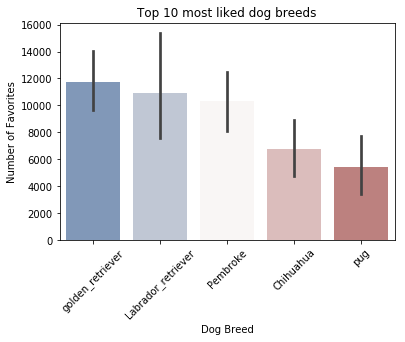

In [347]:
#Most liked type breed using the top5 of most posted dogs and the number of favorites
fig1 = sns.barplot(x='p1', y='favorite_count', data=df, palette='vlag', order=list(df.p1.value_counts().iloc[:5].index))
plt.title('Top 10 most liked dog breeds')
plt.xticks(rotation=45)
plt.xlabel('Dog Breed')
plt.ylabel('Number of Favorites');
#seaborns barplot automatically applies bootstrapping to the categories to compute a confidence interval

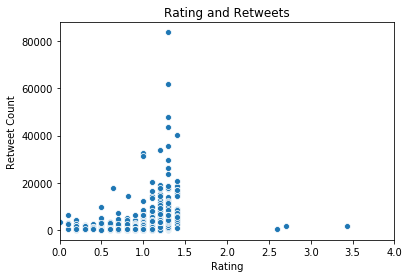

In [348]:
#Visualization of a possible correlation of the rating and retweets
fig2 = sns.scatterplot(x='rating', y='retweet_count', data=df)
fig2.set(xlabel='Rating', ylabel='Retweet Count', title='Rating and Retweets')
fig2.set(xlim=(0, 4));

C:\Users\march\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


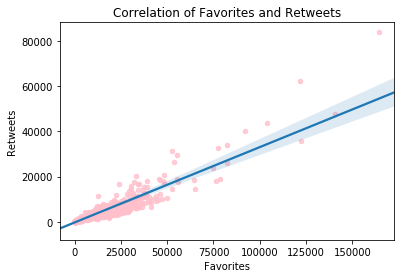

In [349]:
#Correlation of retweets and favorites using seaborns regplot
fig3 = sns.regplot(x='favorite_count', y='retweet_count', data=df, scatter_kws={'color':'pink', 'alpha':0.8, 's':20})
plt.title('Correlation of Favorites and Retweets')
plt.xlabel('Favorites')
plt.ylabel('Retweets');

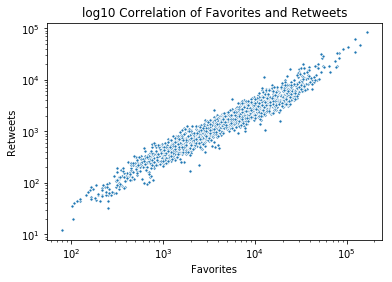

In [350]:
#log10 visualization of retweets and favorites
fig3 = sns.scatterplot(x='favorite_count', y='retweet_count', data=df, s=10)
fig3.set(xscale='log', yscale='log')
plt.title('log10 Correlation of Favorites and Retweets')
plt.xlabel('Favorites')
plt.ylabel('Retweets');

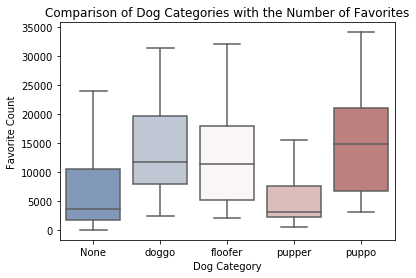

In [351]:
#Looking for differences in dog_categories and the favorite_count
fig4 = sns.boxplot(x='dog_category', y='favorite_count', palette='vlag', data=df, showfliers=False);
plt.xlabel('Dog Category')
plt.ylabel('Favorite Count')
plt.title('Comparison of Dog Categories with the Number of Favorites');

<a id='sources'></a>
# Sources

JSON encoding: https://docs.python.org/2/library/json.html <br>
Pandas .read_json:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html <br>
Pandas .melt: https://www.codementor.io/abhishake/reshaping-pandas-data-with-melt-lazg3j4te <br>
Pandas .str.extract: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html <br>
Pandas .merge: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html <br>
Pandas conditional .drop: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression <br>
Seaborn Barplot: https://seaborn.pydata.org/tutorial/categorical.html <br>
Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html <br>
Seaborn Regplot vs Scatterplot: https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python/19069001#19069001 <br>
Seaborn log scaling: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#log <br>
Top results in .value_counts(): https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas and https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot<br>
Merging dog_category: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python <br>
Smart .drop_duplicates: https://stackoverflow.com/questions/46132884/python-pandas-drop-duplicates-selecting-the-most-complete-row <br>